In [2]:
import numpy as np
import pandas as pd
from pandas import Series ,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [3]:
data=pd.read_csv("c:/Users/Sreehari/Downloads/titanic_dataset.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

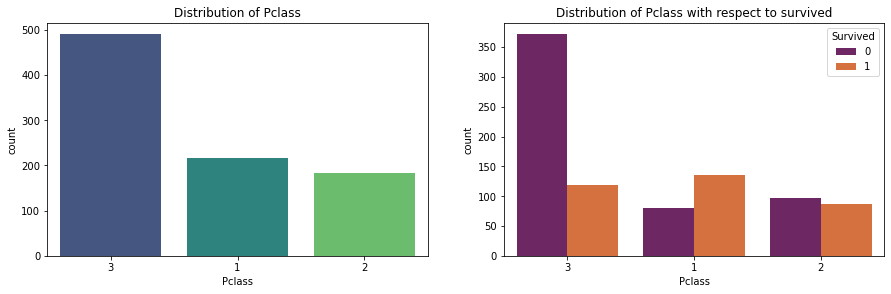

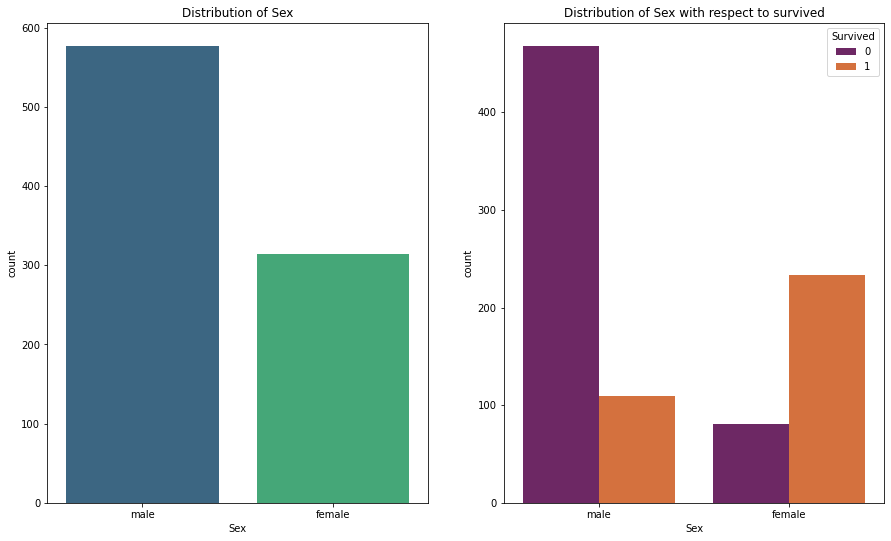

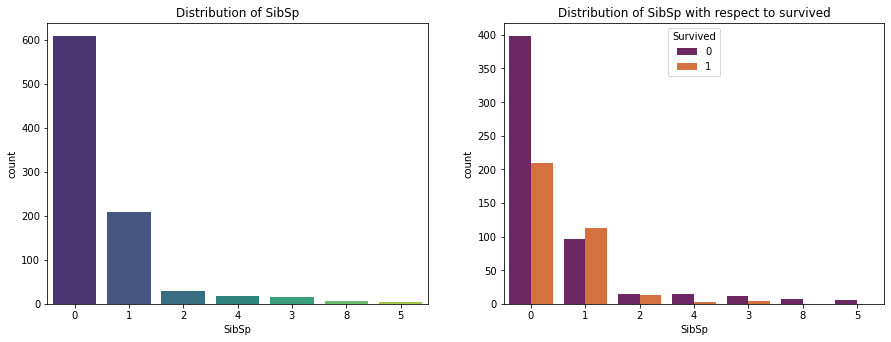

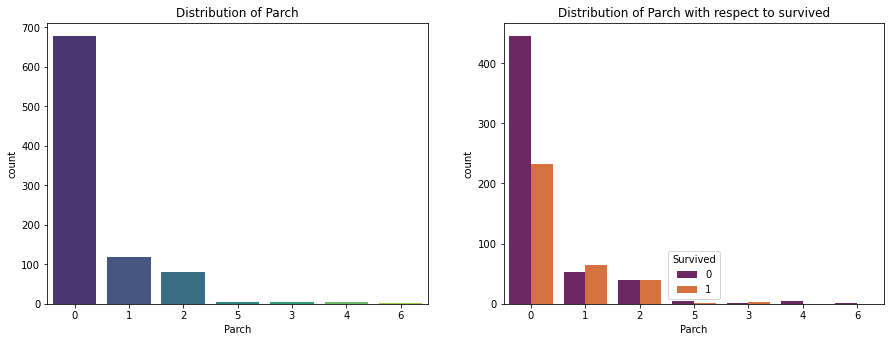

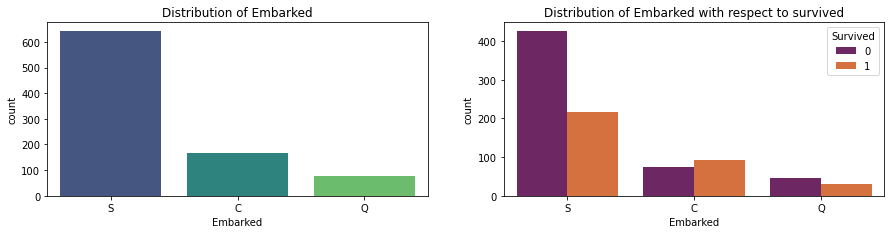

In [11]:
columns =["Pclass","Sex","SibSp","Parch","Embarked" ]

for i in columns:
    plt.figure(figsize=(15,30))
    plt.subplot(len(i), 2, 1)
    sns.countplot(x=data[i],order=data[i].value_counts().index,palette="viridis")
    plt.title('Distribution of {}'.format(i))
    
    plt.subplot(len(i), 2, 2)
    sns.countplot(x=data[i],order=data[i].value_counts().index,hue=data["Survived"],palette="inferno")
    plt.title('Distribution of {} with respect to survived'.format(i))
    plt.show() 

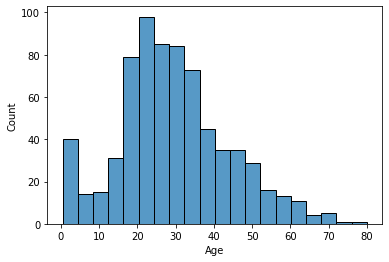

In [12]:
plt.figsize=(15,15)
sns.histplot(data["Age"])
plt.show()

In [13]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [14]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [15]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp = imp.fit(data[['Cabin']])
data['Cabin'] = imp.transform(data[['Cabin']]).ravel()

In [16]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [17]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:ylabel='SibSp'>

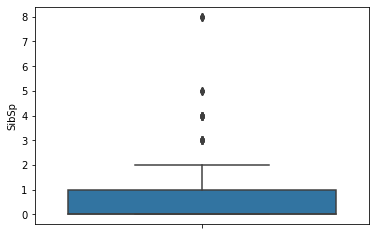

In [18]:
sns.boxplot(y=data["SibSp"])

<AxesSubplot:ylabel='Age'>

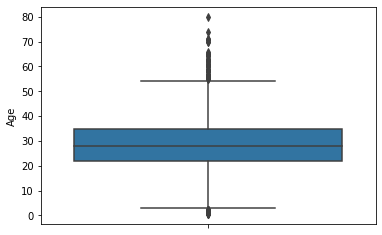

In [19]:
sns.boxplot(y=data["Age"])

<AxesSubplot:ylabel='Parch'>

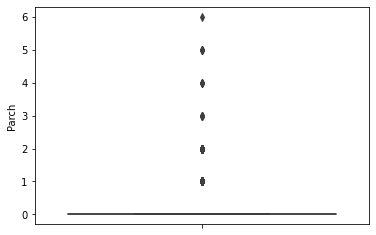

In [20]:
sns.boxplot(y=data["Parch"])

<AxesSubplot:ylabel='Fare'>

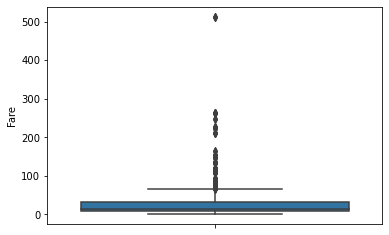

In [21]:
sns.boxplot(y=data["Fare"])

In [22]:
Q1 = np.percentile(data['SibSp'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  1.0
Lower limit is -1.5
Upper Limit is 2.5


In [23]:
index=data['SibSp'][(data['SibSp']>upper_limit)|(data['SibSp']<lower_limit)].index
data.drop(index,inplace=True)

<AxesSubplot:ylabel='SibSp'>

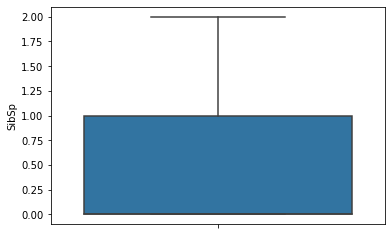

In [24]:
sns.boxplot(y=data["SibSp"])

In [25]:
Q1 = np.percentile(data['Age'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Age'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  13.0
Lower limit is 3.5
Upper Limit is 55.5


In [26]:
data['Age']=np.where(data['Age']>upper_limit,upper_limit,np.where(data['Age']<lower_limit,lower_limit,data['Age']))

<AxesSubplot:ylabel='Age'>

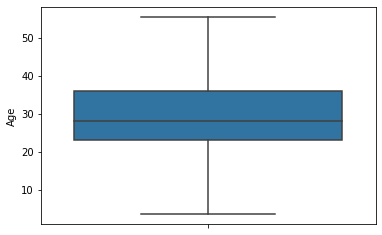

In [27]:
sns.boxplot(y=data["Age"])

In [28]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Fare']=np.where(data['Fare']>upper_whisker,upper_whisker,np.where(data['Fare']<lower_whisker,lower_whisker,data['Fare']))

<AxesSubplot:ylabel='Fare'>

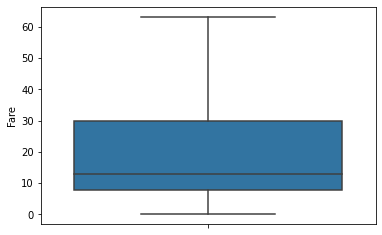

In [29]:
sns.boxplot(y=data["Fare"])

In [30]:
data.drop('Ticket',axis=1,inplace=True)
data.drop('Cabin',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,63.1563,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [32]:
data=pd.get_dummies(data)
data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,63.1563,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


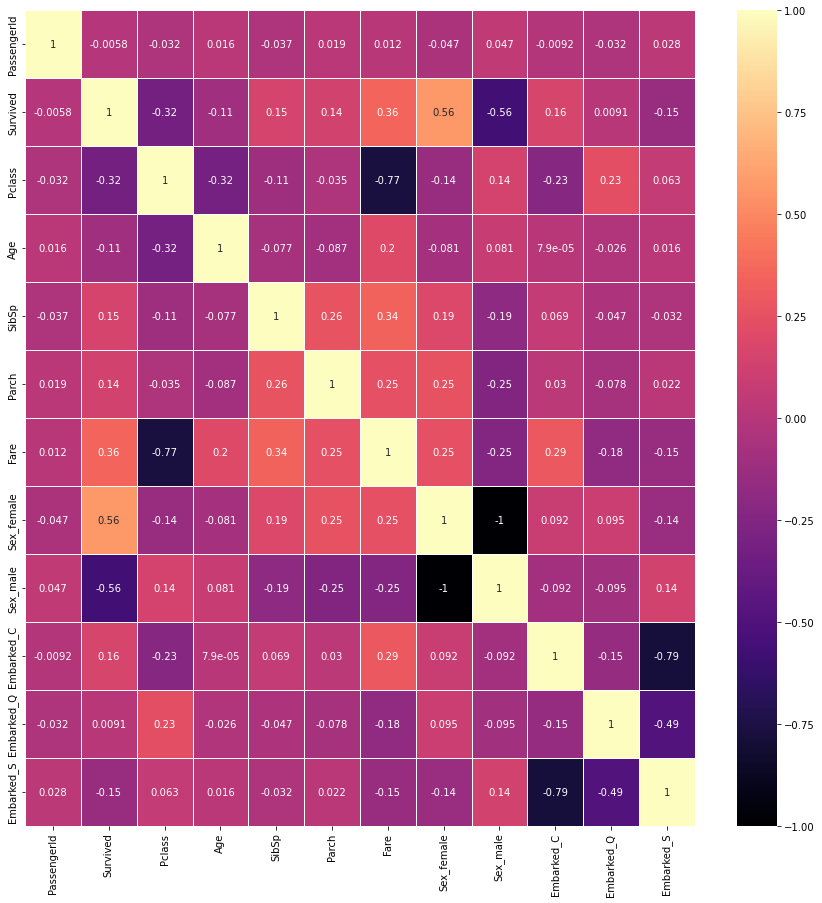

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, cmap="magma")
plt.show()

In [34]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 0.20452061,  0.85946926, -0.49175575, ..., -0.50876855,
        -0.30923128,  0.64360387],
       [ 1.51821986,  0.85946926, -1.2472714 , ...,  1.9655303 ,
        -0.30923128, -1.55375076],
       [ 0.49027996, -1.51196429,  1.94268356, ..., -0.50876855,
        -0.30923128,  0.64360387],
       ...,
       [-0.60909977,  0.85946926, -0.49175575, ..., -0.50876855,
        -0.30923128,  0.64360387],
       [ 0.06560981,  0.85946926, -0.15597101, ..., -0.50876855,
        -0.30923128,  0.64360387],
       [-1.32746704,  0.85946926, -0.82754048, ..., -0.50876855,
        -0.30923128,  0.64360387]])

# Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8106508875739645

In [40]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [41]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [42]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8224852071005917